In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 689 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import datetime 
import datetime 
import matplotlib.pyplot as plt
import math
start = datetime.datetime(2018,1,1) 
end = datetime.datetime(2022, 12 ,7)
SP500 = yf.Ticker("^GSPC") 
#print(Apple.history(start=start, end=end))
df_sp500 = SP500.history(start=start, end=end)
df_sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,0,0
2018-01-03 00:00:00-05:00,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,0,0
2018-01-04 00:00:00-05:00,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,0,0
2018-01-05 00:00:00-05:00,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,0,0
2018-01-08 00:00:00-05:00,2742.669922,2748.510010,2737.600098,2747.709961,3246160000,0,0
...,...,...,...,...,...,...,...
2022-11-30 00:00:00-05:00,3957.179932,4080.110107,3938.580078,4080.110107,6579360000,0,0
2022-12-01 00:00:00-05:00,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0,0
2022-12-02 00:00:00-05:00,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0,0


In [ ]:
def return_rmse(test, predicted,company):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error " + company + " is :{}.".format(rmse))

In [ ]:
def plot_predictions(test, predicted,company):
    plt.plot(test, color="red", label="real " + company +  " stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title(company + " stock price prediction")
    plt.xlabel("time")
    plt.ylabel(company + " stock price")
    plt.legend()
    plt.show()

In [ ]:
train_sp500 = df_sp500[:'2021-10'].iloc[:,1:2].values
test_sp500 = df_sp500['2021-10':].iloc[:,1:2].values

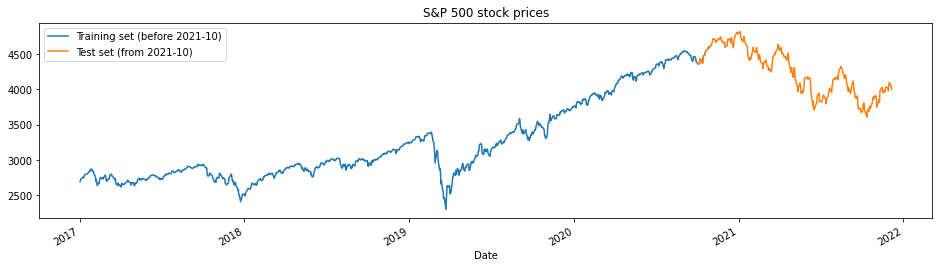

In [ ]:
import matplotlib.pyplot as plt
df_sp500["High"][:'2021-10'].plot(figsize=(16,4), legend=True)
df_sp500["High"]["2021-10":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2021-10)", "Test set (from 2021-10)"])
plt.title("S&P 500 stock prices")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled_sp500 = sc.fit_transform(train_sp500)

In [ ]:
import math
import numpy as np
x_train_sp500 = []
y_train_sp500 = []

for i in range(60,965):
    x_train_sp500.append(train_scaled_sp500[i-60:i, 0])
    y_train_sp500.append(train_scaled_sp500[i,0])

x_train_sp500, y_train_sp500 = np.array(x_train_sp500), np.array(y_train_sp500)

In [ ]:
x_train_sp500 = np.reshape(x_train_sp500, (x_train_sp500.shape[0], x_train_sp500.shape[1], 1)) #reshaping x_train for efficient modelling
x_train_sp500.shape

(905, 60, 1)

In [ ]:
rows = df_sp500.values.tolist()  # convert dataframe into a list
rows.reverse()


In [ ]:
df1 = df_sp500.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train = []
y_train = []
x_test = []
y_test = []
X = []
Y = []
#X.append(pd.date_range(start=start,end=end))

X = df1.values.tolist()
start2 = datetime.datetime(2018,1,1) 
for row in rows:
    #X.append(pd.date_range(start2=start2,end=start2.timedelta(days=1)))
    #start2 += datetime.timedelta(days=1)
    Y.append(row[3])
    #print("Row 0 ",row)
    #print("Row 3" ,row[3])
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.764,test_size=1 - 0.764, random_state=42) # split training and test data #exactly same split as gru

# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# reshape the values as we have only one input feature
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# reshape the values as we have only one input feature
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x_train, y_train)
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}  



In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4,7] # minimum sample number that can be stored in a leaf node
loss = [ "squared_error", "quantile"]

random_grid_gb = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,
'loss': loss
}
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

from sklearn.model_selection import RandomizedSearchCV
gb_random = RandomizedSearchCV(estimator = gb,param_distributions = random_grid_gb,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
gb_random.fit(x_train, y_train)
print ('Random grid: ', random_grid_gb, '\n')
# print the best parameters
print ('Best Parameters: ', gb_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4, 7], 'loss': ['squared_error', 'quantile']} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 70, 'loss': 'squared_error'}  



In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid_svr = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svr = GridSearchCV(SVR(), param_grid_svr, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_svr.fit(x_train, y_train)
#print(grid_svr.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_svr.best_estimator_)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LinearRegression 
clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)

# Support Vector Machine with a Radial Basis Function as kernel 
from sklearn.svm import SVR
clf_svr = SVR(kernel='rbf', C=100, gamma=0.0001)
clf_svr.fit(x_train,y_train)
y_pred_svr = clf_svr.predict(x_test)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=20,min_samples_split = 10, min_samples_leaf=4,max_features = "sqrt", max_depth = 10, bootstrap = True)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)


# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
clf_gb = GradientBoostingRegressor(n_estimators=20,min_samples_split=10,min_samples_leaf = 7,max_features = "auto", max_depth = 70, loss = "squared_error")
clf_gb.fit(x_train,y_train)
y_pred_gb = clf_gb.predict(x_test)

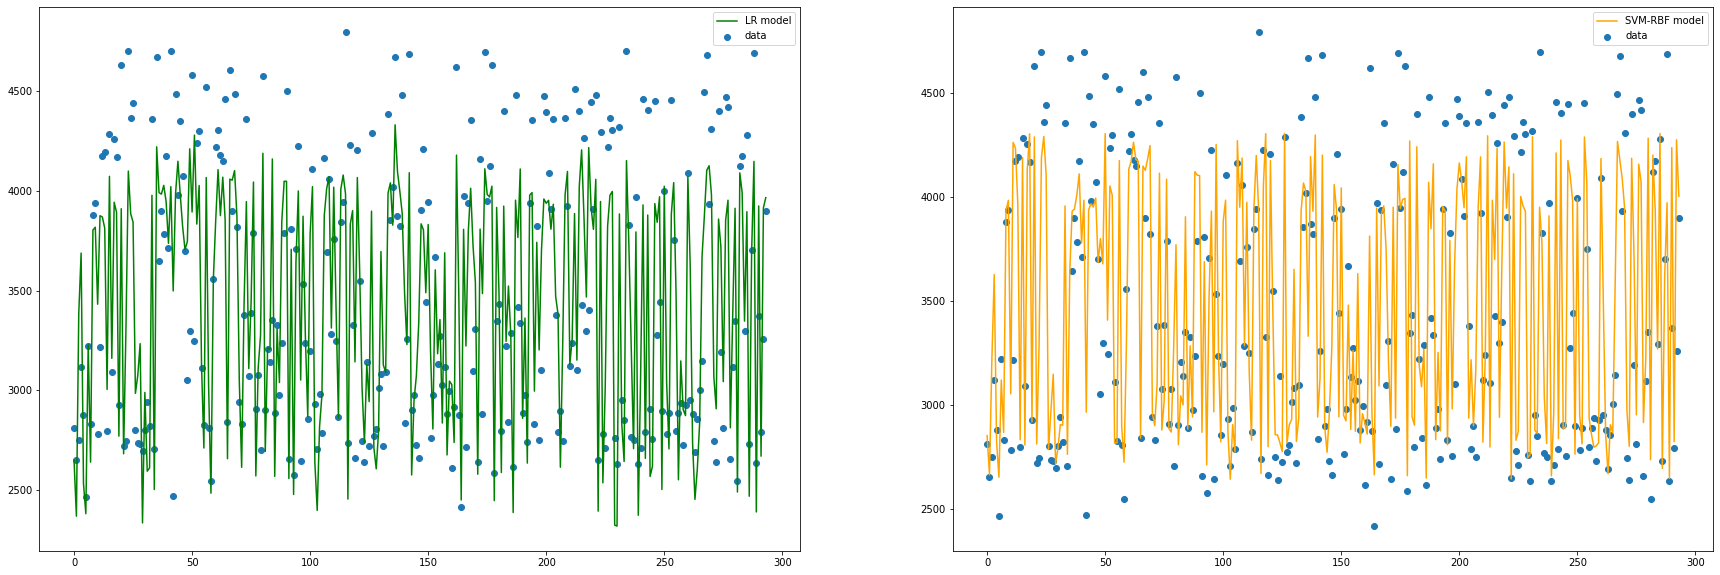

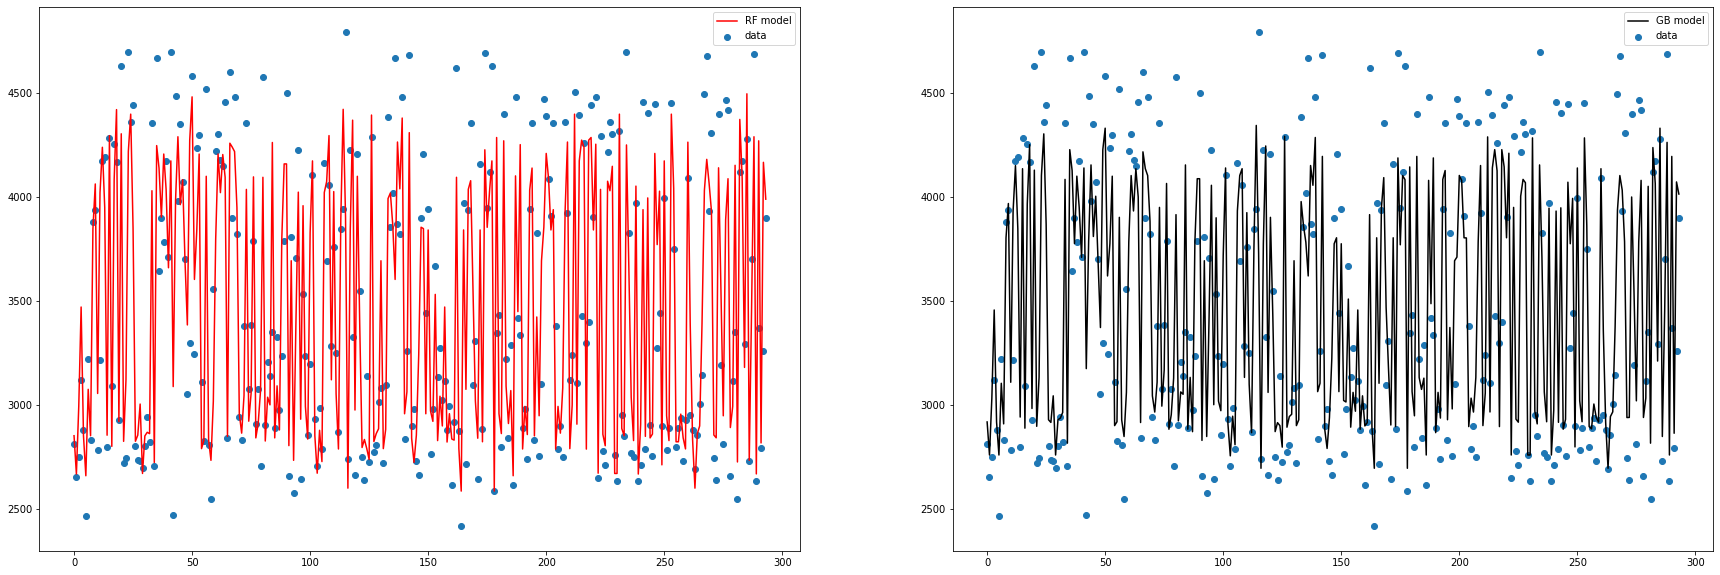

In [ ]:

import matplotlib.pyplot as plt 

f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

# Linear Regression
ax1.scatter(range(len(y_test)),y_test,label='data')
ax1.plot(range(len(y_test)),y_pred_lr,color='green',label='LR model')
ax1.legend()

# Support Vector Machine
ax2.scatter(range(len(y_test)),y_test,label='data')
ax2.plot(range(len(y_test)),y_pred_svr,color='orange',label='SVM-RBF model')
ax2.legend()

f1,(ax3,ax4) = plt.subplots(1,2,figsize=(30,10))

# Random Forest Regressor
ax3.scatter(range(len(y_test)),y_test,label='data')
ax3.plot(range(len(y_test)),y_pred_rf,color='red',label='RF model')
ax3.legend()

# Gradient Boosting Regressor
ax4.scatter(range(len(y_test)),y_test,label='data')
ax4.plot(range(len(y_test)),y_pred_gb,color='black',label='GB model')
ax4.legend()

In [ ]:
import sklearn.metrics as metrics
print("Metrics of Linear Regression")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_lr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_lr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)), 4))
errors = abs(y_pred_lr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Linear Regression
Mean Absolute Error: 302.1448
Mean Squared Error: 138903.0924
Root Mean Squared Error: 372.6971
Accuracy: 91.19 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_lr)
print("R^2 Score for Linear Regression: ", coefficient_of_dermination)

R^2 Score for Linear Regression:  0.7004892614483886


In [ ]:
import sklearn.metrics as metrics
print("Metrics of SVR")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_svr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_svr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)), 4))
errors = abs(y_pred_svr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of SVR
Mean Absolute Error: 234.6782
Mean Squared Error: 110270.79
Root Mean Squared Error: 332.0705
Accuracy: 93.31 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_svr)
print("R^2 Score for SVR: ", coefficient_of_dermination)

R^2 Score for SVR:  0.7622278583344655


In [ ]:
import sklearn.metrics as metrics
print("Metrics of Random Forest")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_rf), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_rf), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)), 4))
errors = abs(y_pred_rf - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Random Forest
Mean Absolute Error: 240.5709
Mean Squared Error: 104779.0906
Root Mean Squared Error: 323.696
Accuracy: 93.17 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_rf)
print("R^2 Score for Random Forest: ", coefficient_of_dermination)

R^2 Score for Random Forest:  0.7740693724513872


In [ ]:
import sklearn.metrics as metrics
print("Metrics of Gradient Boosting Regressor")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_gb), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_gb), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)), 4))
errors = abs(y_pred_gb - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Gradient Boosting Regressor
Mean Absolute Error: 254.5514
Mean Squared Error: 110453.3986
Root Mean Squared Error: 332.3453
Accuracy: 92.77 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_gb)
print("R^2 Score for Gradient Boosting Regressor: ", coefficient_of_dermination)

R^2 Score for Gradient Boosting Regressor:  0.7618341072005497


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD


In [ ]:
# LSTM architecture

regressor_sp500 = Sequential()

# add first layer with dropout

regressor_sp500.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_sp500.shape[1],1)))
regressor_sp500.add(Dropout(0.2))

# add second layer

regressor_sp500.add(LSTM(units=50, return_sequences=True))
regressor_sp500.add(Dropout(0.2))

# add third layer

regressor_sp500.add(LSTM(units=50, return_sequences=True))
regressor_sp500.add(Dropout(0.2))

# add fourth layer

regressor_sp500.add(LSTM(units=50))
regressor_sp500.add(Dropout(0.2))

# the output layer

regressor_sp500.add(Dense(units=1))

In [ ]:
# compiling the LSTM RNN network
regressor_sp500.compile(optimizer='adam', loss='mean_squared_error')
# fit to the training set

regressor_sp500.fit(x_train_sp500, y_train_sp500, epochs=10, batch_size=32)

Epoch 1/10
29/29 [==============================] - 15s 144ms/step - loss: 0.0384
Epoch 2/10
29/29 [==============================] - 4s 143ms/step - loss: 0.0066
Epoch 3/10
29/29 [==============================] - 2s 85ms/step - loss: 0.0059
Epoch 4/10
29/29 [==============================] - 2s 83ms/step - loss: 0.0050
Epoch 5/10
29/29 [==============================] - 2s 81ms/step - loss: 0.0052
Epoch 6/10
29/29 [==============================] - 2s 81ms/step - loss: 0.0047
Epoch 7/10
29/29 [==============================] - 2s 81ms/step - loss: 0.0045
Epoch 8/10
29/29 [==============================] - 2s 81ms/step - loss: 0.0038
Epoch 9/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0042
Epoch 10/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0036


In [ ]:
dataset_total_sp500 = pd.concat((df_sp500['High'][:'2021-10'], df_sp500['High']['2021-10':]), axis=0)
print(dataset_total_sp500.shape)

inputs_sp500 = dataset_total_sp500[len(dataset_total_sp500)-len(test_sp500)-60 : ].values
print(inputs_sp500.shape)
inputs_sp500 = inputs_sp500.reshape(-1,1)
print(inputs_sp500.shape)
inputs_sp500 = sc.transform(inputs_sp500)
print(inputs_sp500.shape)

(1263,)
(358,)
(358, 1)
(358, 1)


In [ ]:
# preparing x_test
x_test_sp500 = []
for i in range(60,358):
    x_test_sp500.append(inputs_sp500[i-60:i, 0])
    
x_test_sp500 = np.array(x_test_sp500)
x_test_sp500 = np.reshape(x_test_sp500, (x_test_sp500.shape[0], x_test_sp500.shape[1], 1))

In [ ]:
predicted_sp500 = regressor_sp500.predict(x_test_sp500)
predicted_sp500 = sc.inverse_transform(predicted_sp500)

10/10 [==============================] - 2s 21ms/step


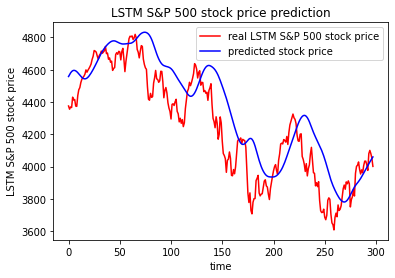

In [ ]:
plot_predictions(test_sp500, predicted_sp500, "LSTM S&P 500")

In [ ]:
return_rmse(test_sp500, predicted_sp500,"S&P 500")

the root mean squared error S&P 500 is :187.112916654548.


In [ ]:
import sklearn.metrics as metrics
print("Metrics of LSTM")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(test_sp500, predicted_sp500), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test_sp500, predicted_sp500), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test_sp500, predicted_sp500)), 4))
errors = abs(predicted_sp500 - test_sp500)
mape = 100 * (errors / test_sp500)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of LSTM
Mean Absolute Error: 149.5955
Mean Squared Error: 35011.2436
Root Mean Squared Error: 187.1129
Accuracy: 96.39 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_sp500, predicted_sp500)
print("R^2 Score for LSTM: ", coefficient_of_dermination)

R^2 Score for LSTM:  0.6778282598612762


In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_sp500.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_sp500.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_sp500.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [ ]:
regressorGRU.compile(optimizer="adam", loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train_sp500, y_train_sp500, epochs=10, batch_size=32)

Epoch 1/10
29/29 [==============================] - 8s 83ms/step - loss: 0.0425
Epoch 2/10
29/29 [==============================] - 2s 83ms/step - loss: 0.0058
Epoch 3/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0047
Epoch 4/10
29/29 [==============================] - 2s 82ms/step - loss: 0.0046
Epoch 5/10
29/29 [==============================] - 2s 84ms/step - loss: 0.0038
Epoch 6/10
29/29 [==============================] - 2s 85ms/step - loss: 0.0036
Epoch 7/10
29/29 [==============================] - 2s 84ms/step - loss: 0.0033
Epoch 8/10
29/29 [==============================] - 2s 83ms/step - loss: 0.0034
Epoch 9/10
29/29 [==============================] - 3s 87ms/step - loss: 0.0031
Epoch 10/10
29/29 [==============================] - 2s 84ms/step - loss: 0.0031


10/10 [==============================] - 1s 18ms/step


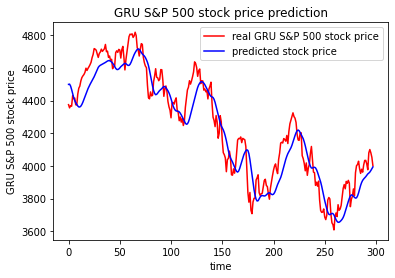

In [ ]:
predicted_with_gru_sp500 = regressorGRU.predict(x_test_sp500)
predicted_with_gru_sp500 = sc.inverse_transform(predicted_with_gru_sp500)

plot_predictions(test_sp500, predicted_with_gru_sp500, "GRU S&P 500")

In [ ]:
return_rmse(test_sp500, predicted_with_gru_sp500,"GRU S&P500")

the root mean squared error GRU S&P500 is :111.2668717058323.


In [ ]:
diff = []
for i in range(len(test_sp500)):
  diff.append(test_sp500[i] - predicted_with_gru_sp500[i])
max_value = max(diff)
max_index = diff.index(max_value)
print(max_index)

118


In [ ]:
len(test_sp500)

298

In [ ]:
df_sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,2683.729980,2695.889893,2682.360107,2695.810059,3397430000,0,0
2018-01-03 00:00:00-05:00,2697.850098,2714.370117,2697.770020,2713.060059,3544030000,0,0
2018-01-04 00:00:00-05:00,2719.310059,2729.290039,2719.070068,2723.989990,3697340000,0,0
2018-01-05 00:00:00-05:00,2731.330078,2743.449951,2727.919922,2743.149902,3239280000,0,0
2018-01-08 00:00:00-05:00,2742.669922,2748.510010,2737.600098,2747.709961,3246160000,0,0


In [ ]:
import sklearn.metrics as metrics
print("Accuracy Scores with GRU")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(test_sp500, predicted_with_gru_sp500), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test_sp500, predicted_with_gru_sp500), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test_sp500, predicted_with_gru_sp500)), 4))
errors = abs(predicted_with_gru_sp500 - test_sp500)
mape = 100 * (errors / test_sp500)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy Scores with GRU
Mean Absolute Error: 93.5364
Mean Squared Error: 12380.3167
Root Mean Squared Error: 111.2669
Accuracy: 97.79 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_sp500, predicted_with_gru_sp500)
print("R^2 Score for GRU: ", coefficient_of_dermination)

R^2 Score for GRU:  0.8860769347326777
